# FCIDECOMP software usage examples

This notebooks presents examples of the different usage patterns of the FCIDECOMP software.

## Introduction

The FCIDECOMP software enable users to read NetCDF files compressed with the FCICOMP compression filter. Once installed, it can be used with:

- Python libraries, such as xarray
- NetCDF-c based software, such as nccopy
- The EUMETSAT Data Tailor ...
- Some NetCDF-Java based applications, such as Panoply

In the following sections, usage examples of the first three points above are reported. For usage with NetCDF-Java based applications, see the README file.

In order to run the following examples, ensure that the ``HDF5_PLUGIN_PATH`` is set to the path of the directory containing the FCIDECOMP software libraries.

## General imports and setting

In the following, general purpose Python libraries and the ``fcidecomp`` Python module are loaded

**NOTE**: if the FCIDECOMP software has been correctly installed and the ``HDF5_PLUGIN_PATH`` has been set to the right location, no error shoudl be raised

In [14]:
import os

import fcidecomp

The following line is needed to show plots in the notebook

In [33]:
%matplotlib inline

Let's assign to the `TEST_FILE_DIR` variable the path to directory containing the test FCICOMP-compressed NetCDF file

In [20]:
TEST_FILE_DIR = "../../tests/test-data"

## Usage with xarray

In [21]:
import xarray as xr

Let's open an FCICOMP compressed file, loading as ``xarray`` dataset a specific group of the NetCDF

In [32]:
ds = xr.open_dataset(os.path.join(TEST_FILE_DIR, "compressed_test.nc"), group='data/ir_105/measured')
ds

<xarray.Dataset>
Dimensions:                                           (x: 5568, y: 140)
Coordinates:
  * x                                                 (x) float32 0.1556 ... ...
  * y                                                 (y) float32 -0.08559 .....
Data variables: (12/14)
    start_position_row                                float32 ...
    start_position_column                             float32 ...
    end_position_row                                  float32 ...
    end_position_column                               float32 ...
    effective_radiance                                (y, x) float32 ...
    pixel_quality                                     (y, x) float32 ...
    ...                                                ...
    radiance_to_bt_conversion_constant_c2             float32 ...
    radiance_to_bt_conversion_coefficient_a           float32 ...
    radiance_to_bt_conversion_coefficient_b           float32 ...
    radiance_to_bt_conversion_coefficient_wavenumber  float32 ...
    channel_effective_solar_irradiance                float32 ...
    index_map                                         (y, x) float32 ...

Now let's plot the ``effective_radiace`` variable, showing that the file has been correctly uncompressed

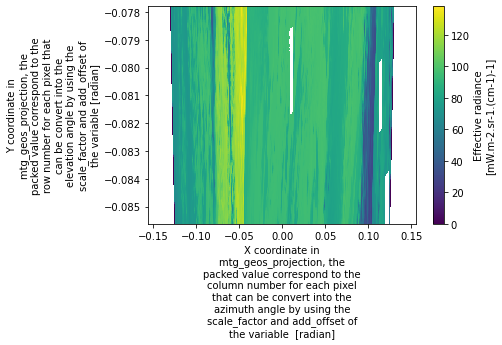

In [23]:
ds.effective_radiance.plot()

## Usage with nccopy

The following line is actually run in the shell

In [27]:
!nccopy -F none {os.path.join(TEST_FILE_DIR, "compressed_test.nc")} {os.path.join(TEST_FILE_DIR, "uncompressed_nccopy.nc")}

Let's open the output of the previous shell command, which uncompressed in a new file the FCIDECOMP-compressed test file

In [28]:
ds = xr.open_dataset(os.path.join(TEST_FILE_DIR, "uncompressed_nccopy.nc"), group='data/ir_105/measured')
ds

<xarray.Dataset>
Dimensions:                                           (x: 5568, y: 140)
Coordinates:
  * x                                                 (x) float32 0.1556 ... ...
  * y                                                 (y) float32 -0.08559 .....
Data variables: (12/14)
    start_position_row                                float32 ...
    start_position_column                             float32 ...
    end_position_row                                  float32 ...
    end_position_column                               float32 ...
    effective_radiance                                (y, x) float32 ...
    pixel_quality                                     (y, x) float32 ...
    ...                                                ...
    radiance_to_bt_conversion_constant_c2             float32 ...
    radiance_to_bt_conversion_coefficient_a           float32 ...
    radiance_to_bt_conversion_coefficient_b           float32 ...
    radiance_to_bt_conversion_coefficient_wavenumber  float32 ...
    channel_effective_solar_irradiance                float32 ...
    index_map                                         (y, x) float32 ...

Now let's plot the ``effective_radiace`` variable, showing that the file has been correctly uncompressed

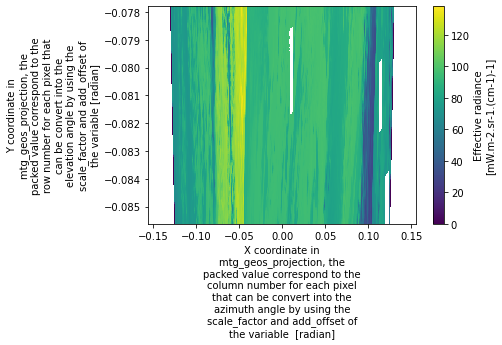

In [29]:
ds.effective_radiance.plot()

## Usage with the EUMETSAT Data Tailor